In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

# (Signed) Antisparse Correlated ($[1 \quad \rho \quad \rho^2 \quad \rho^3]$)

In [2]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV3.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV4.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV5.pkl")[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (1625, 3)
Number of diverge cases for WSM is :  0


,rho,WSM,BSM,ICA,LDMI,PMF
0,0.0,28.838044,26.853807,30.727970,30.279292,30.647335
1,0.1,27.308708,22.048257,24.666685,30.251621,30.577205
2,0.2,26.482212,17.027005,19.512450,29.451274,30.364540
3,0.3,24.940535,13.602476,16.061396,29.245865,30.089540
4,0.4,24.845400,10.895590,13.445154,29.699961,30.203219
5,0.5,22.508200,8.673573,11.226387,27.497859,29.910064
6,0.6,20.150874,6.640247,9.238613,25.330228,29.087612
7,0.7,18.727313,4.562429,7.350622,18.779485,28.776429
8,0.8,15.490891,2.509902,5.289941,12.690864,27.887787


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


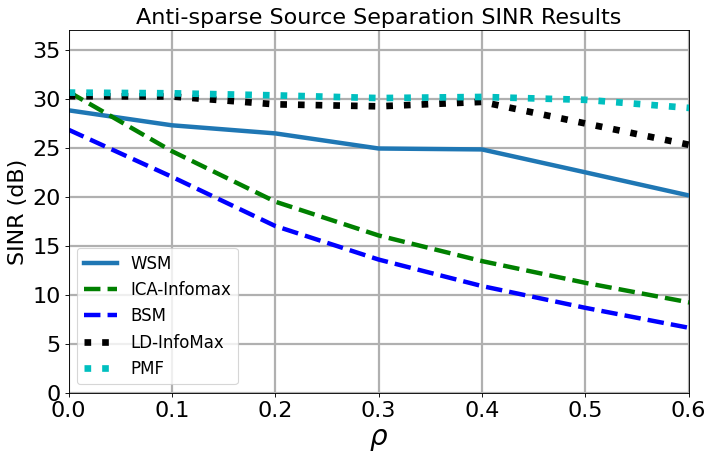

In [3]:
SetPlotRC()

SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRWSM,'-', linewidth=4, label = "WSM")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.6,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())